In [22]:
#load the basic libraries
from __future__ import print_function
import cv2
import numpy as np

from PIL import Image
from tqdm import tqdm
import pdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import os
import tensorflow as tf
import os
import cv2
# import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
# from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import cv2
import numpy as np
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay


In [23]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class Deep_Emotion(nn.Module):
#     def __init__(self):
#         super(Deep_Emotion, self).__init__()
#         self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
#         self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
#         self.conv2_drop = nn.Dropout2d()
#         self.fc1 = nn.Linear(320, 100)
#         self.fc2 = nn.Linear(100, 7)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.norm1 = nn.BatchNorm2d(10)
#         self.norm2 = nn.BatchNorm2d(20)
#         self.localization = nn.Sequential(
#             nn.Conv2d(1, 8, kernel_size=7),
#             nn.MaxPool2d(2, 2),
#             nn.ReLU(True),
#             nn.Conv2d(8, 10, kernel_size=5),
#             nn.MaxPool2d(2, 2),
#             nn.ReLU(True)
#         )
#         self.fc_loc = nn.Sequential(
#             nn.Linear(10 * 4 * 4, 32),
#             nn.ReLU(True),
#             nn.Linear(32, 3 * 2)
#         )
#         self.fc_loc[2].weight.data.zero_()
#         self.fc_loc[2].bias.data.copy_(torch.tensor([1, 0, 0, 0, 1, 0], dtype=torch.float))
#     def stn(self, x):
#         xs = self.localization(x)
#         xs = xs.view(-1, 10 * 4 * 4)
#         theta = self.fc_loc(xs)
#         theta = theta.view(-1, 2, 3)
#         grid = F.affine_grid(theta, x.size())
#         x = F.grid_sample(x, grid)
#         return x
#     def forward(self, input):
#         out=self.stn(input)
#         out = F.relu(self.conv1(out))
#         out = self.pool(out)
#         out = self.norm1(out)
#         out = F.relu(self.conv2(out))
#         out = self.pool(out)
#         out = self.norm2(out)
#         out = out.view(-1, 320)
#         out = F.relu(self.fc1(out))
#         out = F.dropout(out, training=self.training)
#         out = self.fc2(out)
#         return out
    

    
        

<h1>analyzing dataset</h1>

In [24]:
# define a  function to caculate the number of each emotion classes

train_dir = './data/train/'
test_dir = './data/test/'

def Classes_Count( path, name):
    Classes_Dict = {}
    
    for Class in os.listdir(path):
        
        Full_Path = os.path.join(path, Class)
        Classes_Dict[Class] = len(os.listdir(Full_Path))
        
    df = pd.DataFrame(Classes_Dict, index=[name])
    
    return df

Train_Count = Classes_Count(train_dir, 'Train').transpose().sort_values(by="Train", ascending=False)
Test_Count = Classes_Count(test_dir, 'Test').transpose().sort_values(by="Test", ascending=False)

In [25]:
pd.concat([Train_Count,Test_Count] , axis=1)

,Train,Test
happy,7215,1774
neutral,4965,1233
sad,4830,1247
fear,4097,1024
angry,3995,958
surprise,3171,831
disgust,436,111


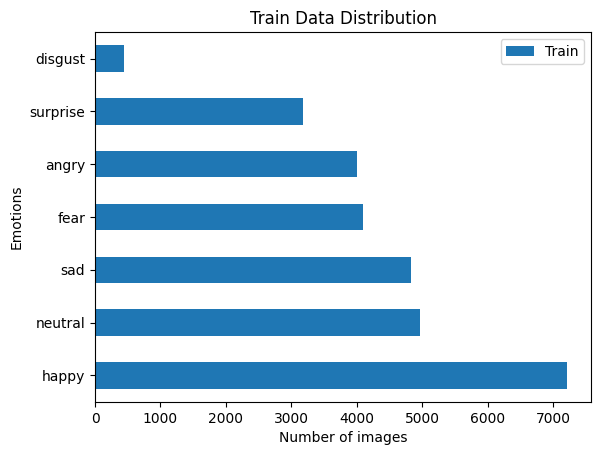

In [26]:
Train_Count.plot(kind='barh')
plt.title('Train Data Distribution')
plt.xlabel('Number of images')
plt.ylabel('Emotions')
plt.show()

Explanation: The number of happy faces is about 20 times tha disgust faces in training data set.



<Axes: >

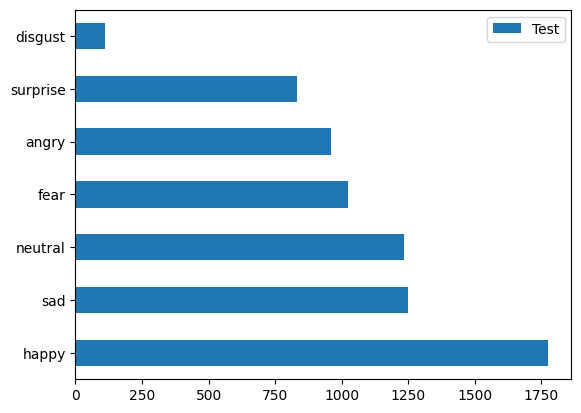

In [27]:
Test_Count.plot(kind='barh')

Explanation: The number of happy faces is about 17 times tha disgust faces in test data set.

<h1>showing some images</h1>

In [28]:
d ={}
train_path = "./data/train"
for folder in sorted(os.listdir(train_path)): 
    folder_path = os.path.join(train_path,folder)
    d[folder] = []
    for image in os.listdir(folder_path)[:5]:
        image_path = os.path.join(folder_path,image)
        image = np.array(Image.open(image_path))
        d[folder].append(image)


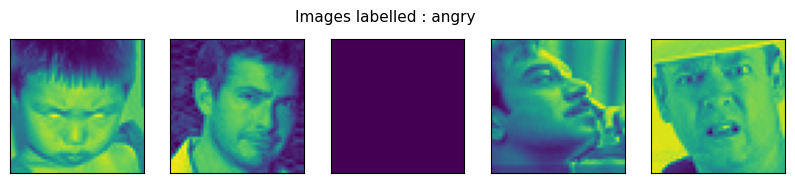

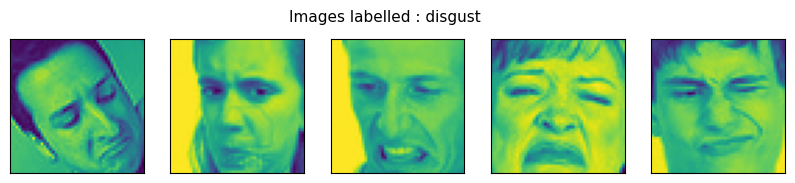

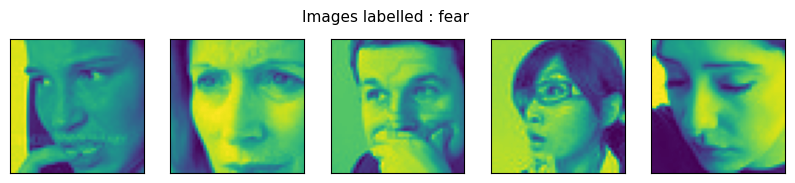

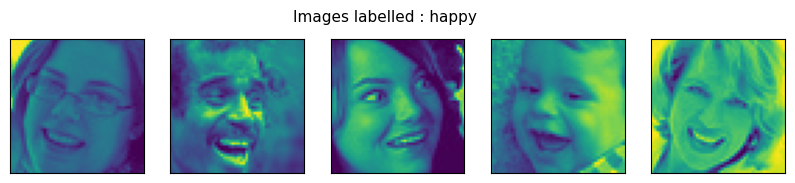

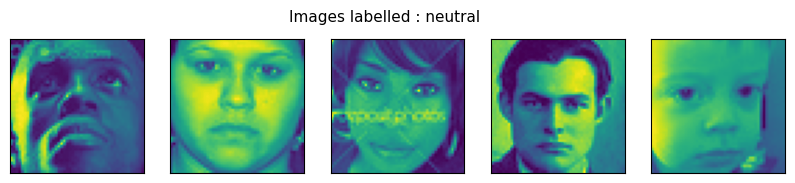

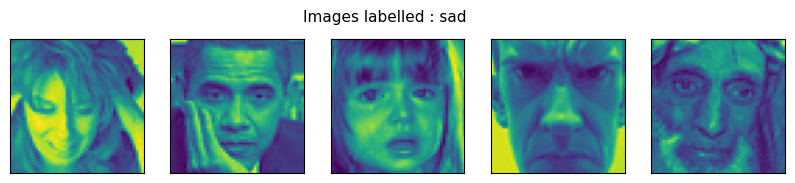

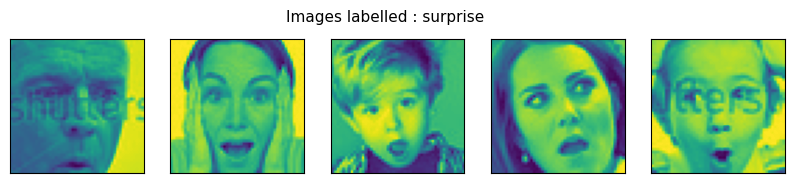

In [29]:
def plot_images(d,label): 
    fig, ax = plt.subplots(1,5, figsize = (10,2))
    fig.suptitle('Images labelled : {}' .format(label), fontsize=11)
    for col in range(5): 
        ax[col].imshow(d[label][col])
        ax[col].tick_params(
        axis = 'both',
        which='both',      
        bottom=False,
        left = False, 
        top=False,         
        labelbottom=False,
        labelleft=False)
for key in d.keys():
    plot_images(d,key)

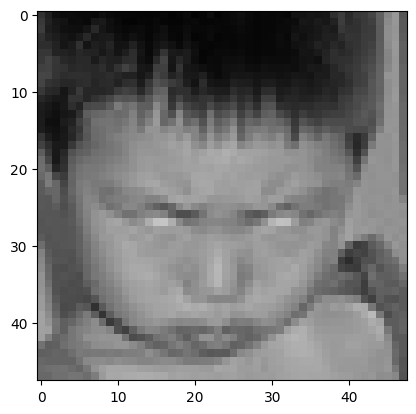

In [30]:
dataDirectory = "./data/train"
classess = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

for category in classess:
    path = os.path.join(dataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
    

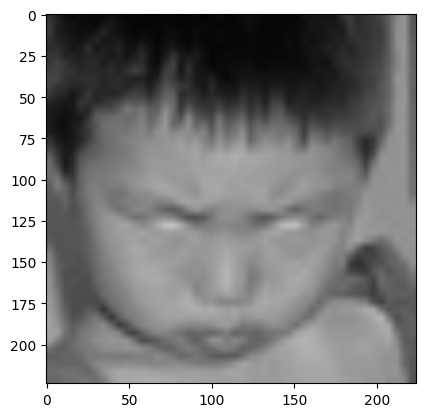

In [31]:
img_size = 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array)
plt.show()
##for transfer learning if we want to use image classification models the image has to be 244

In [32]:
training_data=[]
def create_training_data():
    for category in classess:
        print(category)
        path = os.path.join(dataDirectory , category)  # Assuming you have a "training_data" directory
        class_num = classess.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))  # Make sure 'img_size' is defined
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

# Call the function to create the training data
create_training_data()

angry


100%|██████████| 3995/3995 [00:00<00:00, 5854.79it/s]


disgust


100%|██████████| 436/436 [00:00<00:00, 5551.71it/s]


fear


100%|██████████| 4097/4097 [00:00<00:00, 5940.36it/s]


happy


100%|██████████| 7215/7215 [00:01<00:00, 5914.98it/s]


neutral


100%|██████████| 4965/4965 [00:03<00:00, 1271.94it/s]


sad


100%|██████████| 4830/4830 [00:11<00:00, 415.13it/s]


surprise


100%|██████████| 3171/3171 [00:07<00:00, 412.14it/s]


In [33]:
# print(len(training_data))

In [34]:
# import random
# random.shuffle(training_data)

In [35]:
# x = []  # Features
# y = []  # Labels

# for features, label in training_data:
#     x.append(features)
#     y.append(label)

# # Assuming img_size is defined and it's the target size (e.g., 224)
# x = np.array(x).reshape(-1, img_size, img_size, 1)



In [36]:
# x.shape

In [37]:
# x=x/255.0

In [38]:
# y=np.array(y)   

In [39]:
# y.shape

<h1>training the model</h1>

In [40]:
# model = tf.keras.applications.MobileNetV2()

In [41]:
# model.summary()

<h1>transfer learning</h1>

In [42]:
# base_input = model.layers[0].input

In [43]:
# base_output = model.layers[-2].output

In [44]:
# base_output

In [45]:
# final_output = Dense(128)(base_output)
# final_output = Dense(64)(final_output)
# final_output = Dense(7, activation='softmax')(final_output)
    

In [46]:
# new_model = Model(inputs=base_input, outputs=final_output)

In [47]:
# new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
# new_model.save('my_model.h5')

In [49]:
# new_model= tf.keras.models.load_model('my_model.h5')

In [50]:
# import cv2
# import numpy as np

# path = "haarcascade_frontalface_default.xml"

# font_scale = 1.5
# font = cv2.FONT_HERSHEY_PLAIN
# rectangle_bgr = (255, 255, 255)
# img = np.zeros((500, 500))

# text = "Some text in a box!"

# (text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

# text_offset_x = 10
# text_offset_y = img.shape[0] - 25

# box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))

# cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
# cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

# cap = cv2.VideoCapture(0)

# while True:
#     ret, frame = cap.read()
#     face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#     mymodel = tf.keras.models.load_model('my_model.h5')
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.1, 4)

#     for x, y, w, h in faces:
#         roi = frame[y:y+h, x:x+w]
#         roi = cv2.resize(roi, (224, 224))
#         roi = preprocess_input(roi)
#         roi = np.expand_dims(roi, axis=0)
#         preds = mymodel.predict(roi)[0]
#         print(preds)
#         label = classess[preds.argmax()]

#         cv2.putText(frame, label, (x, y), font, 1, (255, 255, 0), 2)
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

#     if len(faces) == 0:
#         cv2.putText(frame, "No Face Found", (50, 50), font, 2, (0, 0, 255), 2)

#     cv2.imshow('Emotion Detector', frame)

#     if cv2.waitKey(2) & 0xFF == ord('q'):
#         break

# cap.release()
# cv2.destroyAllWindows()


In [51]:
train_path = "./data/train/"
for folder in sorted(os.listdir(train_path)): 
    folder_path = os.path.join(train_path,folder)
    d[folder] = []
    for image in os.listdir(folder_path)[:5]:
        image_path = os.path.join(folder_path,image)
        image = np.array(Image.open(image_path))
        d[folder].append(image)

In [52]:
# train_aug = ImageDataGenerator(
#         preprocessing_function=preprocess_input,
#         rotation_range=25, width_shift_range=0.1,
#         height_shift_range=0.1, shear_range=0.2, 
#         zoom_range=0.2,horizontal_flip=True, 
#         fill_mode="nearest")
# val_aug = ImageDataGenerator(
#         preprocessing_function=preprocess_input
# )

NameError: name 'preprocess_input' is not defined

In [ ]:
# def create_model():
#     model = Sequential()
#     model.add(Conv2D(64,(3,3),padding = "same", activation = "relu", input_shape = (48,48,3)))
#     model.add(BatchNormalization())
#     model.add(Conv2D(64,(3,3), activation = "relu",padding = "same"))
#     model.add(BatchNormalization())
#     model.add(Conv2D(64,(3,3), activation = "relu",padding = "same"))
    
#     model.add(MaxPool2D(2,2))
#     model.add(Conv2D(128,(3,3), activation = "relu",padding = "same"))
#     model.add(BatchNormalization())
#     model.add(Conv2D(128,(3,3), activation = "relu",padding = "same"))
#     model.add(BatchNormalization())
#     model.add(Conv2D(128,(3,3), activation = "relu",padding = "same"))
#     model.add(MaxPool2D(2,2))
#     model.add(Conv2D(256,(3,3), activation = "relu",padding = "same"))
#     model.add(BatchNormalization())
#     model.add(Conv2D(256,(3,3), activation = "relu",padding = "same"))
#     model.add(BatchNormalization())
#     model.add(Conv2D(256,(3,3), activation = "relu",padding = "same"))
#     model.add(MaxPool2D(2,2))
  
#     model.add(Flatten())
#     model.add(Dense(256, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.5))
#     model.add(Dense(128,activation='relu'))
#     model.add(Dense(7, activation='softmax'))
#     return model

In [ ]:
# train_data = train_aug.flow_from_directory(
#             train_path,
#             target_size = (48,48),
#             shuffle = True)

Found 28709 images belonging to 7 classes.


In [ ]:
# val_data = val_aug.flow_from_directory(
#         "./data/test",
#         target_size = (48,48),
#         shuffle = False
#             )

Found 7178 images belonging to 7 classes.


In [ ]:
# model = create_model()

In [ ]:
# model.compile(
#     optimizer = Adam(learning_rate = 0.001),
#     loss = "categorical_crossentropy",
#     metrics = ["accuracy"])

In [ ]:
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0

In [ ]:
# model.fit(train_data,epochs = 50,validation_data = val_data)

Epoch 1/50
898/898 [==============================] - 632s 700ms/step - loss: 1.8287 - accuracy: 0.2622 - val_loss: 1.9676 - val_accuracy: 0.2081
Epoch 2/50
898/898 [==============================] - 609s 678ms/step - loss: 1.6536 - accuracy: 0.3330 - val_loss: 1.5564 - val_accuracy: 0.3923
Epoch 3/50
898/898 [==============================] - 624s 695ms/step - loss: 1.4573 - accuracy: 0.4340 - val_loss: 1.3070 - val_accuracy: 0.5089
Epoch 4/50
898/898 [==============================] - 623s 693ms/step - loss: 1.3370 - accuracy: 0.4852 - val_loss: 1.4053 - val_accuracy: 0.4636
Epoch 5/50
898/898 [==============================] - 620s 690ms/step - loss: 1.2756 - accuracy: 0.5130 - val_loss: 1.5825 - val_accuracy: 0.4315
Epoch 6/50
898/898 [==============================] - 619s 689ms/step - loss: 1.2230 - accuracy: 0.5367 - val_loss: 1.1714 - val_accuracy: 0.5506
Epoch 7/50
898/898 [==============================] - 623s 693ms/step - loss: 1.1810 - accuracy: 0.5566 - val_loss: 1.2871 -

In [ ]:
# model.save('my_model.h5')

c:\Users\af773\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'your_model_weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

225/225 [==============================] - 27s 120ms/step


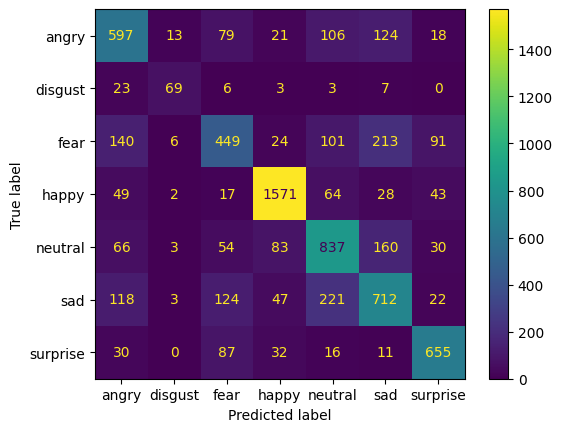

In [ ]:
model= tf.keras.models.load_model('my_model.h5')
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis = 1)

ConfusionMatrixDisplay(confusion_matrix(val_data.classes,y_pred_classes),
                       display_labels=list(train_data.class_indices.keys())).plot()

In [ ]:
def get_label(i):
    return list(train_data.class_indices.keys())[i]

In [ ]:
X_test = []

test_path = "./data/test"

for folder in sorted(os.listdir(test_path)):
    image_folder =  test_path +"/"+ folder
    images = sorted(os.listdir(image_folder))
    print ('Loaded the images of -'+'{} having {} images. \n'.format(folder, len(images)))
    for image in images:
        image_path = image_folder +"/"+ image
        x = Image.open(image_path)
        x = x.convert("RGB")
        x = np.array(x)
        img_resize = cv2.resize(x, (224,224))
        X_test.append(img_resize)

Loaded the images of -angry having 958 images. 

Loaded the images of -disgust having 111 images. 

Loaded the images of -fear having 1024 images. 

Loaded the images of -happy having 1774 images. 

Loaded the images of -neutral having 1233 images. 

Loaded the images of -sad having 1247 images. 

Loaded the images of -surprise having 831 images. 



In [ ]:
def plot_errors(true_label,predicted_label):
    rows,cols = 1,5
    fig, ax = plt.subplots(rows,cols,figsize=(10, 3))
    x = ((y_pred_classes == predicted_label) & (val_data.classes == true_label))
    y = np.where(x == True)[0]
    z = np.random.randint(0,len(y),5)
    fig.suptitle('Predicted : {}, Real : {}' .format(get_label(predicted_label), get_label(true_label)), fontsize=11)
    for col in range(cols):
        ax[col].imshow(X_test[y[z[col]]])
        ax[col].tick_params(
        axis = 'both',
        which='both',      
        bottom=False,
        left = False, 
        top=False,         
        labelbottom=False,
        labelleft=False)

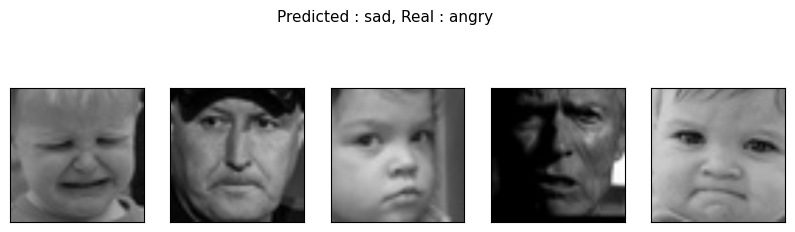

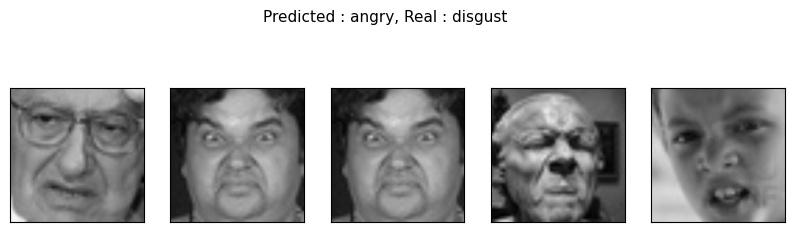

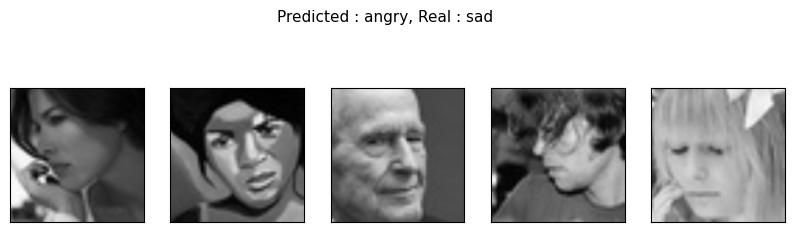

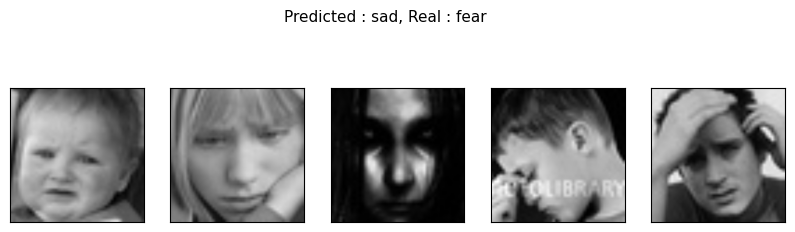

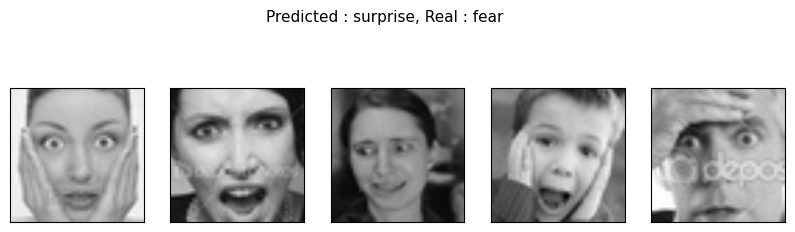

In [ ]:
plot_errors(0,5)
plot_errors(1,0)
plot_errors(5,0)
plot_errors(2,5)
plot_errors(2,6)

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf

model= tf.keras.models.load_model('my_model.h5')

In [ ]:
def preprocess_frame_sequential(frame):
    # If the frame is not grayscale, convert it to grayscale
    if frame.shape[-1] != 1:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Resize the frame to (48, 48) and normalize it
    frame = cv2.resize(frame, (48, 48))
    frame = frame / 255.0  # Normalize to [0, 1]

    # Add an extra channel
    frame = np.expand_dims(frame, axis=-1)

    return frame

def predict_emotion_sequential(frame, model):
    # Preprocess the frame to match the "sequential" model's input shape
    frame = preprocess_frame_sequential(frame)
    frame = np.expand_dims(frame, axis=0)

    # Make predictions
    emotion_probabilities = model.predict(frame)
    emotion_class = np.argmax(emotion_probabilities)

    return emotion_class


In [ ]:
import cv2



def detect_faces():
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        for x, y, w, h in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        cv2.imshow('Face Detection', frame)
        predict_emotion(frame, model)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()



In [ ]:
detect_faces()

KeyboardInterrupt: 

In [53]:
import cv2
import numpy as np
from keras.models import load_model

# Define your create_model function and other model-related code here.

def detect_faces_and_emotions(model):
    # Your face detection and emotion recognition code goes here.


    # The rest of your code, including the face detection and emotion recognition part
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

            # Extract the region of interest (ROI) where the face is detected
            face_roi = gray[y:y+h, x:x+w]

            # Predict emotion for the face ROI using your emotion recognition model
            emotion_class = predict_emotion_sequential(face_roi, model)

            # Define emotion labels based on your model's output classes
            emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
            emotion_label = emotion_labels[emotion_class]

            # Display the predicted emotion label on the frame
            cv2.putText(frame, emotion_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        cv2.imshow('Face Detection and Emotion Recognition', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()



In [54]:
model = load_model('my_model.h5')
detect_faces_and_emotions(model)

error: OpenCV(4.8.1) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x11a46be7::Set<1,-1,-1>,struct cv::impl::A0x11a46be7::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [57]:
frame=cv2.imread('./vecteezy_one-sad-african-boy-sulking-in-poverty-looking-at-camera_24893155_921.jpg')
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray.shape


(3467, 6067)

In [58]:
faces= faceCascade.detectMultiScale(gray,1.1,4)

for (x,y,w,h) in faces:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h,x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi=roi_color[ey:ey+eh,ex:ex+ew]

Face not detected


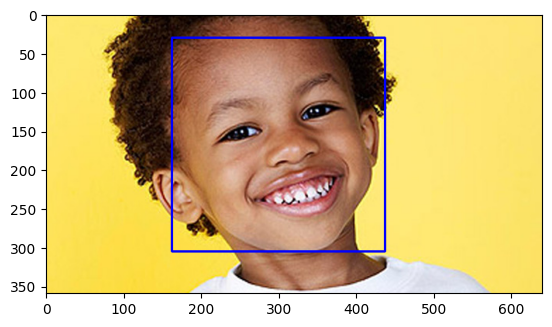

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

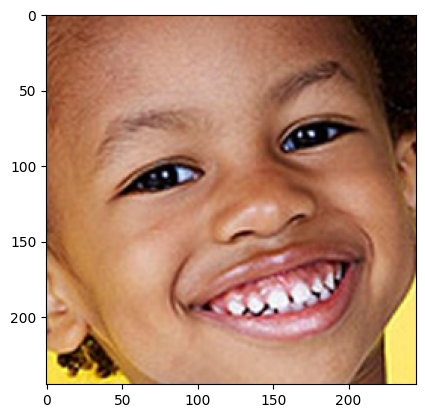

In [ ]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [59]:
final_image=cv2.resize(face_roi,(48,48))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0
predcs=model.predict(final_image)
predcs[0]
print(predcs)

1/1 [==============================] - 1s 958ms/step
[[3.89826521e-02 3.55306838e-04 3.40198912e-02 5.20173870e-02
  7.45305836e-01 1.18346855e-01 1.09721608e-02]]


In [64]:
import cv2

path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255, 255, 255)
img = np.zeros((500, 500))
text = "Some text in a box!"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
cv2.imshow('Face Emotion Recognition', img)


cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for x, y, w, h in faces: 
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
        facess = face_cascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey:ey+eh, ex:ex+ew]

    final_image = cv2.resize(face_roi, (48,48))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image / 255.0
    font=cv2.FONT_HERSHEY_SIMPLEX
    predcsweb = model.predict(final_image)


# Find the index of the highest value
    index_of_max = np.argmax(predcsweb)

    # Remove the highest value from the array
    predcsweb = np.delete(predcsweb, index_of_max)
    secondhighst=predcsweb[1]
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

   
    if(np.argmax(predcsweb)==0):
        status = "Angry"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)  
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    elif(np.argmax(predcsweb)==1):
        status = "Disgust"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)  
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    elif (np.argmax(predcsweb)==2):
        status = "Fear"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)  
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    elif (np.argmax(predcsweb)==3):
        status = "Happy"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))

        
    elif (np.argmax(predcsweb)==4):
        status = "Sad"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    else:
        status = "Surprise"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    cv2.imshow('Face Emotion Recognition', frame)
    print(predcsweb )
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()








1/1 [==============================] - 0s 34ms/step
[0.03918601 0.00034536 0.03386797 0.05166237 0.11942831 0.01073052]
1/1 [==============================] - 0s 38ms/step
[0.03918601 0.00034536 0.03386797 0.05166237 0.11942831 0.01073052]
1/1 [==============================] - 0s 34ms/step
[0.03918601 0.00034536 0.03386797 0.05166237 0.11942831 0.01073052]
1/1 [==============================] - 0s 33ms/step
[0.03918601 0.00034536 0.03386797 0.05166237 0.11942831 0.01073052]
1/1 [==============================] - 0s 34ms/step
[0.03918601 0.00034536 0.03386797 0.05166237 0.11942831 0.01073052]
1/1 [==============================] - 0s 30ms/step
[0.03918601 0.00034536 0.03386797 0.05166237 0.11942831 0.01073052]
1/1 [==============================] - 0s 31ms/step
[0.03918601 0.00034536 0.03386797 0.05166237 0.11942831 0.01073052]
1/1 [==============================] - 0s 31ms/step
[0.03918601 0.00034536 0.03386797 0.05166237 0.11942831 0.01073052]
1/1 [==============================] - 0